In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, interpolate

In [2]:
%matplotlib notebook

In [3]:
x_mu = 0
sd_x = 1
sd_y = 1

N_K = 101
N_M = int(1e4) #1e8 for Anderson 2011
N_ens_array = np.array([10, 20, 40, 80, 160])
ens_array_size = N_ens_array.size

In [4]:
r_k = -1 + 2*np.arange(N_K)/(N_K - 1)
r_ens = np.ones([ens_array_size, N_K, N_M])*np.nan
C = np.ones([2, 2])
for n_e, N_ens in enumerate(N_ens_array):
    print('\n', f'Ens. Size: {N_ens}')
    for k, this_r in enumerate(r_k):
        print(k, end=', ')
        for m in range(N_M):
            C[[1, 0], [0, 1]] = this_r
            sample = np.random.multivariate_normal(mean=[0, 0], cov=C, size=N_ens)
            r_ens[n_e, k, m] = np.corrcoef(sample.T)[0, 1]

10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
40
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
80
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38

In [5]:
r_k_mean = np.ones([ens_array_size, r_k.size]) * np.nan
r_k_sd = np.ones([ens_array_size, r_k.size]) * np.nan
alpha =np.ones([ens_array_size, r_k.size]) * np.nan
S = np.ones([ens_array_size, r_k.size]) * np.nan

r_bounds = r_k[:-1] + 1/(N_K - 1)
r_bounds = np.concatenate([[-1], r_bounds, [1]])
for n_e, N_ens in enumerate(N_ens_array):
    print(N_ens)
    for k, this_r in enumerate(r_k):
    #     print([r_bounds[k], r_bounds[k + 1]])
        r_counts = np.logical_and(r_bounds[k] < r_ens[n_e], r_ens[n_e] <= r_bounds[k + 1]).sum(axis=-1)
        r_k_sd[n_e, k] = np.sqrt(np.cov(r_k, fweights=r_counts))
        r_k_mean[n_e, k] = (r_k * r_counts).sum() / r_counts.sum()
        alpha[n_e, k] = r_k_mean[n_e, k]**2 / (r_k_sd[n_e, k]**2 + r_k_mean[n_e, k]**2)
        S[n_e, k] = alpha[n_e, k] * r_k_mean[n_e, k]/this_r

        if k % 10 == 0:
            gauss_r = np.exp(-(r_k - r_k_mean[n_e, k])**2/(2*r_k_sd[n_e, k]**2))
            plt.figure()
            plt.plot(r_k, r_counts/r_counts.max())
            plt.plot(r_k, gauss_r)
            plt.legend(['hist', 'gauss'])
            plt.title(f'Ens. Size: {N_ens}')

10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/travis/miniconda3/envs/letkf/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/travis/miniconda3/envs/letkf/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

40


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

80


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

160


/home/travis/miniconda3/envs/letkf/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/home/travis/miniconda3/envs/letkf/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

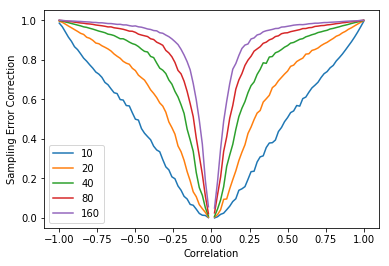

In [14]:
plt.figure()
for n_e in range(ens_array_size):
    plt.plot(r_k, S[n_e])
plt.xlabel('Correlation')
plt.ylabel('Sampling Error Correction')
plt.legend(N_ens_array)

In [25]:
r_k[int((N_K - 1)/2) - 1 ::-1]

array([-0.02, -0.04, -0.06, -0.08, -0.1 , -0.12, -0.14, -0.16, -0.18,
       -0.2 , -0.22, -0.24, -0.26, -0.28, -0.3 , -0.32, -0.34, -0.36,
       -0.38, -0.4 , -0.42, -0.44, -0.46, -0.48, -0.5 , -0.52, -0.54,
       -0.56, -0.58, -0.6 , -0.62, -0.64, -0.66, -0.68, -0.7 , -0.72,
       -0.74, -0.76, -0.78, -0.8 , -0.82, -0.84, -0.86, -0.88, -0.9 ,
       -0.92, -0.94, -0.96, -0.98, -1.  ])

In [31]:
r_k[int((N_K - 1)/2)]

0.0

In [26]:
r_k[int((N_K - 1)/2) + 1:] + r_k[int((N_K - 1)/2) - 1 ::-1]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
        -1.11022302e-16,  -1.11022302e-16,  -1.11022302e-16,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
        -1.11022302e-16,  -1.11022302e-16,  -1.11022302e-16,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.11022302e-16,
         1.11022302e-16,  -1.11022302e-16,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.11022302e-16,
         1.11022302e-16,  -1.11022302e-16,  -1.11022302e-16,
        -1.11022302e-16,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [36]:
S[:, int((N_K - 1)/2) - 1 ::-1].shape

(5, 50)

In [42]:
centered_S = 1/2 * (S[:, int((N_K - 1)/2) - 1 ::-1] + S[:, int((N_K - 1)/2) + 1:])
centered_S = np.concatenate([np.zeros(ens_array_size)[:, None], centered_S], axis=1)

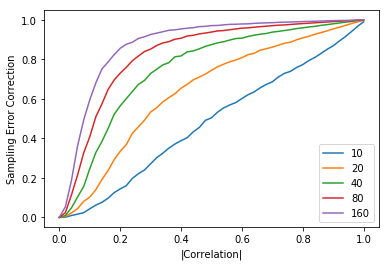

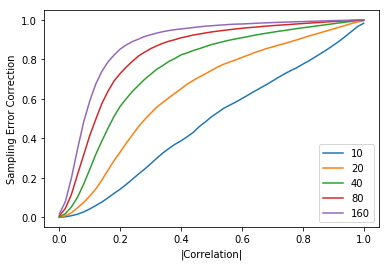

In [45]:
sort_index = np.argsort(np.abs(r_k))
plt.figure()
for n_e in range(ens_array_size):
    plt.plot(np.abs(r_k[int((N_K - 1)/2):]), centered_S[n_e])
plt.xlabel('|Correlation|')
plt.ylabel('Sampling Error Correction')
plt.legend(N_ens_array)

smoothed_centered_S = ndimage.uniform_filter1d(centered_S, size=3, mode='nearest')
sort_index = np.argsort(np.abs(r_k))
plt.figure()
for n_e in range(ens_array_size):
    plt.plot(np.abs(r_k[int((N_K - 1)/2):]), smoothed_centered_S[n_e])
plt.xlabel('|Correlation|')
plt.ylabel('Sampling Error Correction')
plt.legend(N_ens_array)

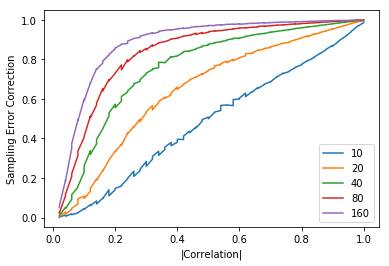

In [12]:
sort_index = np.argsort(np.abs(r_k))
plt.figure()
for n_e in range(ens_array_size):
    plt.plot(np.abs(r_k[sort_index]), S[n_e, sort_index])
plt.xlabel('|Correlation|')
plt.ylabel('Sampling Error Correction')
plt.legend(N_ens_array)

/home/travis/miniconda3/envs/letkf/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


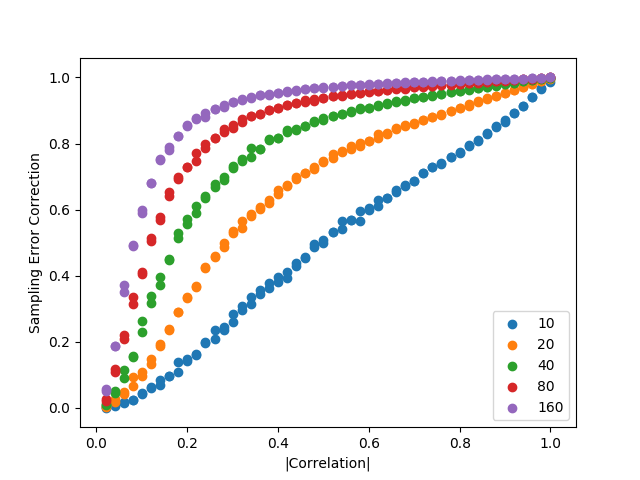

In [7]:
plt.figure()
for n_e in range(ens_array_size):
    plt.scatter(np.abs(r_k), S[n_e])
plt.xlabel('|Correlation|')
plt.ylabel('Sampling Error Correction')
plt.legend(N_ens_array)

In [47]:
# test

In [113]:
N_e = 20
n_e = np.where(N_ens_array == N_e)[0].item()

In [114]:
loc_function = interpolate.interp1d(r_k[int((N_K - 1)/2):], centered_S[n_e], kind='cubic')

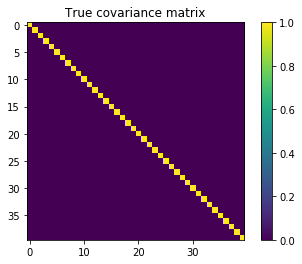

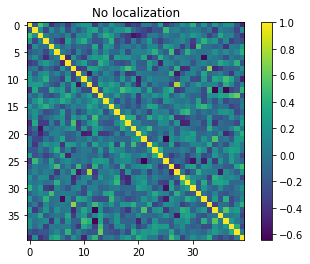

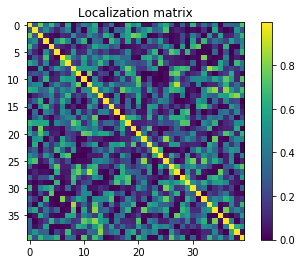

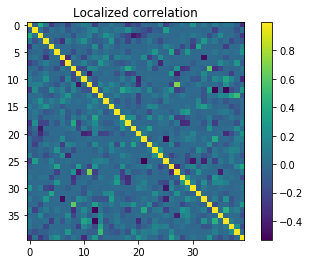

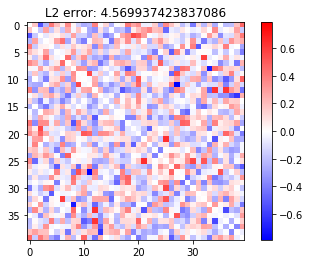

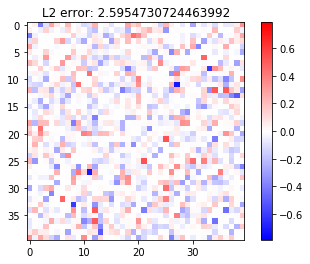

In [115]:
N_state = 40
trial_num = 1
P = np.eye(N_state)

R = np.eye(N_state)

plt.figure()
im = plt.imshow(P)
plt.colorbar(im)
plt.title('True covariance matrix')

for trial in range(trial_num):
    this = np.random.multivariate_normal(mean=np.zeros(N_state), cov=P, size=N_e)
    C = np.corrcoef(this.T)
    
    plt.figure()
    im = plt.imshow(C)
    plt.colorbar(im)
    plt.title('No localization')
    
    loc = loc_function(np.abs(C))
    
    plt.figure()
    im = plt.imshow(loc)
    plt.colorbar(im)
    plt.title('Localization matrix')
    
    plt.figure()
    im = plt.imshow(C * loc)
    plt.colorbar(im)
    plt.title('Localized correlation')
    
    error_C = P - C
    error_loc_C = P - C * loc
    
    vmax = np.max([np.abs(error_C).max(),
                   np.abs(error_loc_C).max()])
    
    L2 = np.linalg.norm(error_C, ord=2)
    plt.figure()
    im = plt.imshow(error_C, cmap='bwr',
                    vmax=vmax, vmin=-vmax)
    plt.colorbar(im)
    plt.title(f'L2 error: {L2}')
    
    L2 = np.linalg.norm(error_loc_C, ord=2)
    plt.figure()
    im = plt.imshow(error_loc_C, cmap='bwr',
                    vmax=vmax, vmin=-vmax)
    plt.colorbar(im)
    plt.title(f'L2 error: {L2}')

In [130]:
rho = np.arange(40)[None, :]
print(rho)
print((rho + 20) % 40)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]]
[[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39  0  1  2  3
   4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]]


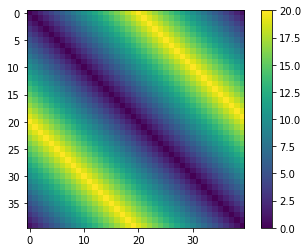

In [133]:
rho_l = np.arange(N_state)[None, :]
rho = np.abs(rho_l - rho_l.T)
rho = np.minimum(rho, (N_state - np.abs(rho_l - rho_l.T)) % N_state)


plt.figure()
im = plt.imshow(rho)
plt.colorbar(im)

In [137]:
P_hat.diagonal()

array([ 1.16813875,  1.30504269,  1.30439068,  1.14350529,  0.89684966,
        0.71939404,  0.73842437,  0.96749955,  1.30830606,  1.62265234,
        1.80381914,  1.80896615,  1.66186539,  1.44098567,  1.23113484,
        1.05563011,  0.89330462,  0.71664835,  0.54707342,  0.44496958,
        0.46765935,  0.62089702,  0.86128507,  1.11841115,  1.33753021,
        1.48882988,  1.57366657,  1.60668789,  1.6113939 ,  1.60166945,
        1.57886083,  1.51147197,  1.349181  ,  1.08375052,  0.7866893 ,
        0.57234641,  0.51597437,  0.60065069,  0.76732297,  0.96795457])

/home/travis/miniconda3/envs/letkf/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: covariance is not positive-semidefinite.


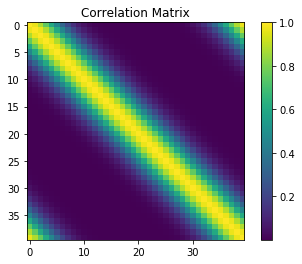

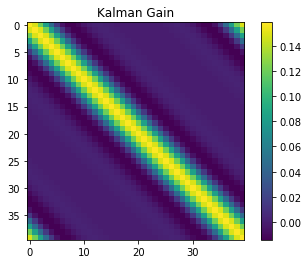

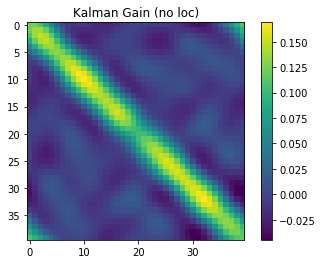

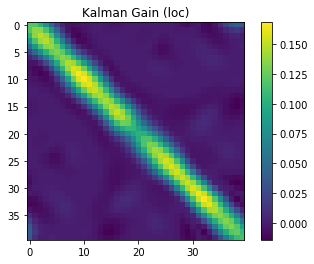

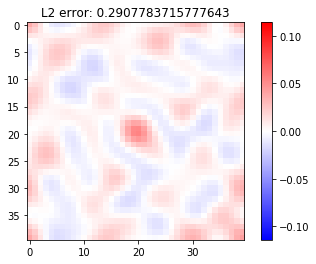

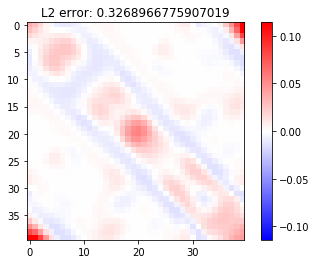

In [135]:
N_state = 40
trial_num = 1

rho0 = 4
rho_l = np.arange(N_state)[None, :]
rho = np.abs(rho_l - rho_l.T)
rho = np.minimum(rho, (N_state - np.abs(rho_l - rho_l.T)) % N_state)
P = np.exp(-(rho)**2/(2*rho0**2))

R = np.eye(N_state)

K = P @ np.linalg.inv(P + R)

plt.figure()
im = plt.imshow(P)
plt.colorbar(im)
plt.title('Correlation Matrix')

plt.figure()
im = plt.imshow(K)
plt.colorbar(im)
plt.title('Kalman Gain')

for trial in range(trial_num):
    sample = np.random.multivariate_normal(mean=np.zeros(N_state), cov=P, size=N_e)
    C = np.corrcoef(this.T)
    
    P_hat = np.cov(sample.T)
    K_hat = P_hat @ np.linalg.inv(P_hat + R)
    
    # loc = loc_function(np.abs(K_hat))
    loc = loc_function(np.abs(C))
    
    plt.figure()
    im = plt.imshow(K_hat)
    plt.colorbar(im)
    plt.title('Kalman Gain (no loc)')
    
    plt.figure()
    im = plt.imshow(K_hat * loc)
    plt.colorbar(im)
    plt.title('Kalman Gain (loc)')
    
    error_K = K - K_hat
    error_K_loc = K - K_hat * loc
    
    vmax = np.max([np.abs(error_K).max(),
                   np.abs(error_K_loc).max()])
    
    L2 = np.linalg.norm(error_K, ord=2)
    plt.figure()
    im = plt.imshow(error_K, cmap='bwr',
                    vmax=vmax, vmin=-vmax)
    plt.colorbar(im)
    plt.title(f'L2 error: {L2}')
    
    L2 = np.linalg.norm(error_K_loc, ord=2)
    plt.figure()
    im = plt.imshow(error_K_loc, cmap='bwr',
                    vmax=vmax, vmin=-vmax)
    plt.colorbar(im)
    plt.title(f'L2 error: {L2}')